Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

1.0


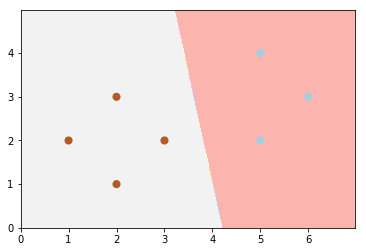

In [4]:
model = RidgeClassifier(alpha=0)
model.fit(seven_X, seven_y)

print(accuracy_score(seven_y, model.predict(seven_X)))

mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : model.predict(x) >= 0)
plt.show()

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

[ 1.   0.8  1.4  0.4 -0.6 -0.8 -1.2]


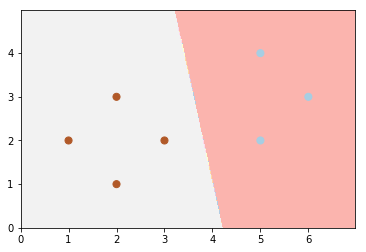

In [5]:
model = LinearRegression()
model.fit(seven_X, seven_y)

print(model.predict(seven_X))

mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x : model.predict(x) >= 0)
plt.show()

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

**A:** $h(\mathbf{x})=0.5$

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

0.875


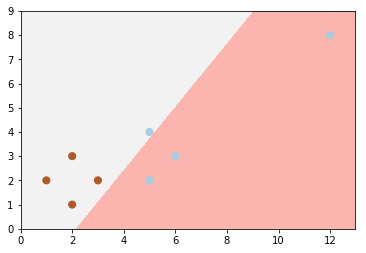

In [7]:
model = RidgeClassifier(alpha=0)
model.fit(outlier_X, outlier_y)

print(accuracy_score(outlier_y, model.predict(outlier_X)))

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, lambda x : model.predict(x) >= 0)
plt.show()

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

**A:** Funkcija gubitka (kvadratno odstupanje dobivene vrijednosti od ciljne) kažnjava "previše točne" primjere.

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

0.875


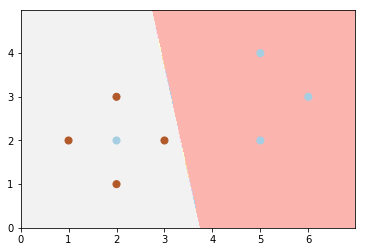

In [9]:
model = RidgeClassifier(alpha=0)
model.fit(unsep_X, unsep_y)

print(accuracy_score(unsep_y, model.predict(unsep_X)))

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, lambda x : model.predict(x) >= 0)
plt.show()

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

**A:** Premalo je primjera da bi se moglo tvrditi kako se u slučaju (2,2) ne radi o šumu.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

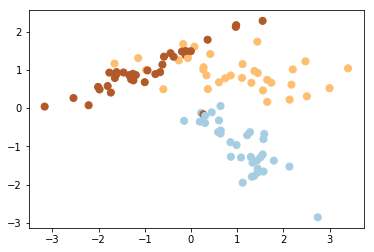

In [11]:
multiclass_X, multiclass_y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)

mlutils.plot_2d_clf_problem(multiclass_X, multiclass_y, h=None)
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

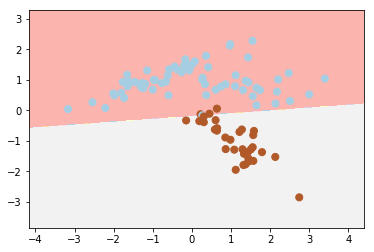

In [12]:
h1_y = [1 if y == 0 else -1 for y in multiclass_y]
model_h1 = LinearRegression()
model_h1.fit(multiclass_X, h1_y)

mlutils.plot_2d_clf_problem(multiclass_X, h1_y, lambda x : model_h1.predict(x) >= 0)
plt.show()

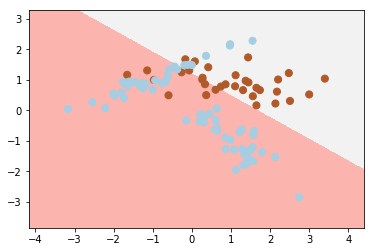

In [13]:
h2_y = [1 if y == 1 else -1 for y in multiclass_y]
model_h2 = LinearRegression()
model_h2.fit(multiclass_X, h2_y)

mlutils.plot_2d_clf_problem(multiclass_X, h2_y, lambda x : model_h2.predict(x) >= 0)
plt.show()

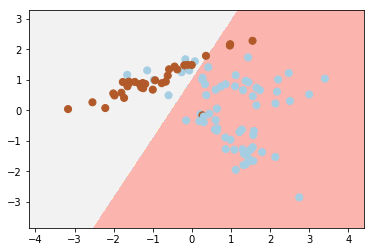

In [14]:
h3_y = [1 if y == 2 else -1 for y in multiclass_y]
model_h3 = LinearRegression()
model_h3.fit(multiclass_X, h3_y)

mlutils.plot_2d_clf_problem(multiclass_X, h3_y, lambda x : model_h3.predict(x) >= 0)
plt.show()

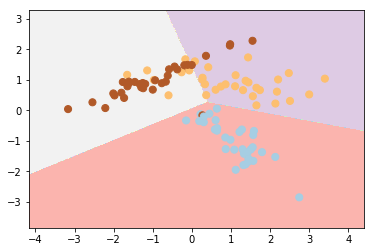

In [15]:
def ovr_argmax(x):
    return np.argmax(np.stack((model_h1.predict(x), model_h2.predict(x), model_h3.predict(x)), axis=-1), axis=1)

mlutils.plot_2d_clf_problem(multiclass_X, multiclass_y, lambda x : ovr_argmax(x))
plt.show()

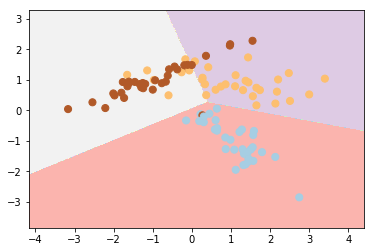

In [16]:
model = RidgeClassifier(alpha=0)
model.fit(multiclass_X, multiclass_y)

mlutils.plot_2d_clf_problem(multiclass_X, multiclass_y, lambda x : model.predict(x))
plt.show()

***A:*** OVR ima manji broj modela od OVO sheme.

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [17]:
def sigm(x):
    return (1/(1 + np.exp(-x)))

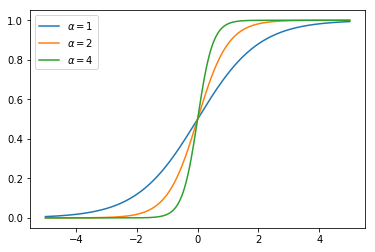

In [18]:
x = np.linspace(-5, 5, num=1000)

plt.plot(x, sigm(x), label=r'$\alpha = 1$')
plt.plot(x, sigm(2*x), label=r'$\alpha = 2$')
plt.plot(x, sigm(4*x), label=r'$\alpha = 4$')
plt.legend(loc='best')
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

***A:*** Jer je derivabilna, uz to što nudi izlaz [0,1] pogodan za probabilističku interpretaciju.

</br>

***A:*** Faktor $\alpha$ predstavlja nagib krivulje. Dakle povećanje magnitude vektora težina $w$ pridonosi "otvrdnjavanju" sigmoide, odnosno prenaučenosti modela.

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [19]:
def lr_h(x, w):
    if len(x) == len(w) - 1:
        x = np.append(1, x)
    return sigm(w.T.dot(x))

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    y = [0 if yi == -1 else yi for yi in y]
    iter_no = 0
    err = 1000
    ex_err = 1000
    intercept = 0
    coef = np.zeros(X.shape[1])
    weights = []   
    while True:
        delta_intercept = 0
        delta_coef = np.zeros(X.shape[1])
        for i in range(X.shape[0]):
            h = lr_h(X[i], np.append(intercept, coef))
            delta_intercept += h - y[i]
            delta_coef += (h-y[i]) * X[i]
            
        intercept -= eta * delta_intercept
        coef = (1-eta*alpha)*coef - eta*delta_coef
        weights.append(np.append(intercept, coef))
        
        iter_no += 1
        err = cross_entropy_error(X, y, weights[-1])
        if np.absolute(err - ex_err) < epsilon or iter_no >= max_iter:
            break
        ex_err = err 

    return np.array(weights) if trace == True else weights[-1]

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [20]:
from sklearn.metrics import log_loss

In [21]:
def cross_entropy_error(X, y, w):
    return log_loss(y, [lr_h(x, w) for x in X])

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

0.135218727202


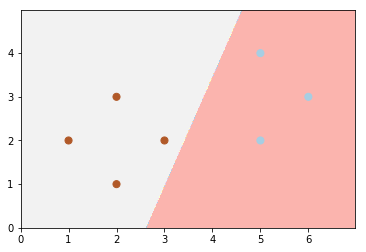

In [22]:
#seven_y = [0 if y == -1 else y for y in seven_y]
w = lr_train(seven_X, seven_y)

print(cross_entropy_error(seven_X, seven_y, w))

mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda X : np.array([lr_h(x, w) for x in X]) >= 0.5)
plt.show()

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

***A:*** Stagnacija u promjeni vrijednosti funkcije pogreške.

</br>
***A:*** Izlaz modela nije $\{0,1\}$, već unutar intervala $[0,1]$ pa pogreška mora postojati. Izravno se modelira aposteriorna vjerojatnost $P(y|x)$.

</br>
***A:*** Modifikacijom parametara optimizacijskog postupka - faktora stope učenja $\eta$ i kriterija zaustavljanja (stagnacije vrijednosti pogreške $\epsilon$ i maksimalnog broja iteracija).

</br>
***A:*** Ugađanje težina bi trebalo biti unutar iteracije po primjerima umjesto izvan nje, čime ne bi bilo potrebe za $\Delta w$

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [23]:
from sklearn.metrics import zero_one_loss

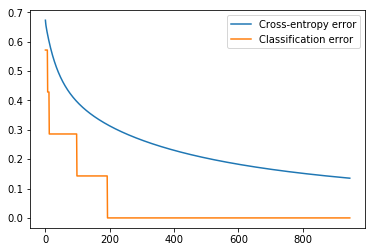

In [24]:
cross_entropy_err = []
classification_err = []

weights = lr_train(seven_X, seven_y, trace=True)
for w in weights:
    cross_entropy_err.append(cross_entropy_error(seven_X, seven_y, w))
    classification_err.append(zero_one_loss(seven_y, [1 if lr_h(x, w) >= 0.5 else -1 for x in seven_X]))
    
plt.plot(cross_entropy_err, label='Cross-entropy error')
plt.plot(classification_err, label='Classification error')
plt.legend(loc='best')
plt.show()

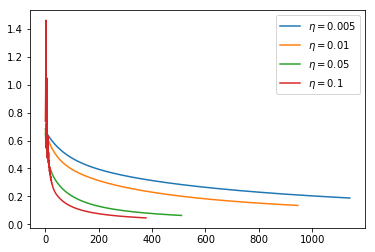

In [25]:
step_sizes = np.array([0.005, 0.01, 0.05, 0.1])

for step_size in step_sizes:
    cross_entropy_err = []
    weights = lr_train(seven_X, seven_y, trace=True, eta=step_size)
    for w in weights:
        cross_entropy_err.append(cross_entropy_error(seven_X, seven_y, w))
    plt.plot(cross_entropy_err, label='$\eta={}$'.format(step_size))

plt.legend(loc='best')
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

**A:** Logistički gubitak je iznosom uvijek veći ili jednak gubitku 0-1, koji je korišten za izračun pogreške klasifikacije.

</br>
**A:** Optimalan izbor je $\eta=0.1$, zbog najbrže konvergencije postupka.

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(max_iter=2000, solver='sag')
model.fit(seven_X, seven_y)
print(log_loss(seven_y, model.predict(seven_X)))

9.99200722163e-16


### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

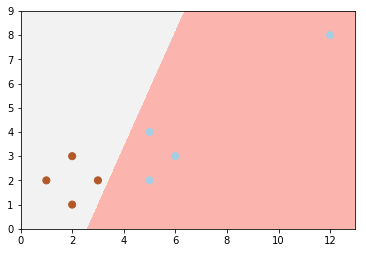

In [28]:
w = lr_train(outlier_X, outlier_y)

mlutils.plot_2d_clf_problem(outlier_X, outlier_y, lambda X : np.array([lr_h(x, w) for x in X]) >= 0.5)
plt.show()

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

**A:** Model linearne regresije koristi kvadratni gubitak koji kažnjava i "pretočno" klasificirane primjere, dok logistički gubitak to ne radi.

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


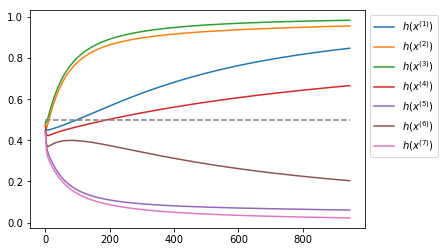

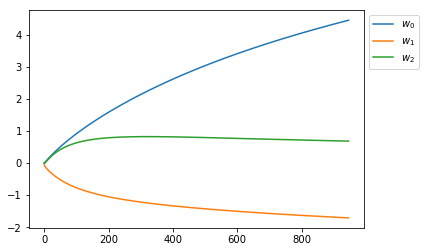

In [29]:
model_output = []

weights = lr_train(seven_X, seven_y, trace=True)
for w in weights:
    model_output.append(np.array([lr_h(x, w) for x in seven_X]))

model_output = np.asarray(model_output)
for i in range(seven_X.shape[0]):
    plt.plot(model_output[:,i], label=r'$h(x^{{({})}})$'.format(i + 1))
plt.plot([0.5] * weights.shape[0], '--')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

for i in range(weights.shape[1]):
    plt.plot(weights[:,i], label=r'$w_{}$'.format(i))
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

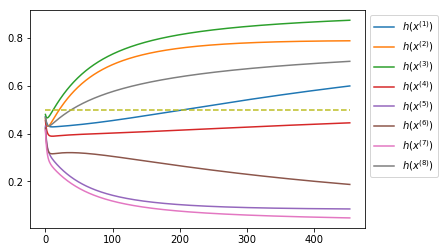

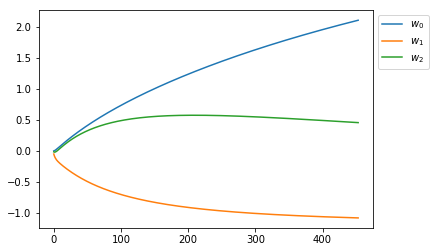

In [30]:
model_output = []

weights = lr_train(unsep_X, unsep_y, trace=True)
for w in weights:
    model_output.append(np.array([lr_h(x, w) for x in unsep_X]))

model_output = np.asarray(model_output)
for i in range(unsep_X.shape[0]):
    plt.plot(model_output[:,i], label=r'$h(x^{{({})}})$'.format(i + 1))
plt.plot([0.5] * weights.shape[0], '--')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

for i in range(weights.shape[1]):
    plt.plot(weights[:,i], label=r'$w_{}$'.format(i))
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

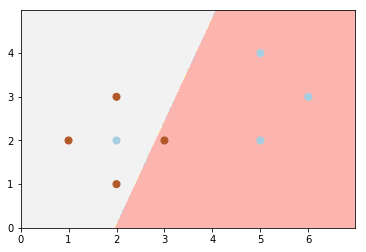

In [31]:
w = lr_train(unsep_X, unsep_y)

mlutils.plot_2d_clf_problem(unsep_X, unsep_y, lambda X : np.array([lr_h(x, w) for x in X]) >= 0.5)
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

**A:** Da bi smanjio pogrešku, model slabijim rastom $w_0$ ostaje bliže $(2,2)$, pod cijenu pogrešne klasifikacije $(3,2)$.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

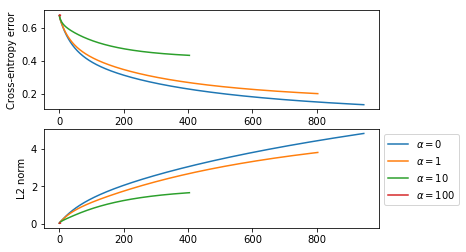

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

reg_factors = np.array([0, 1, 10, 100])
for reg_factor in reg_factors:
    norms = []
    cross_entropy_err = []
    weights = lr_train(seven_X, seven_y, trace=True, alpha=reg_factor)
    for w in weights:
        norms.append(np.linalg.norm(w))
        cross_entropy_err.append(cross_entropy_error(seven_X, seven_y, w))
    ax1.plot(cross_entropy_err, label=r'$\alpha={}$'.format(reg_factor))
    ax2.plot(norms, label=r'$\alpha={}$'.format(reg_factor))
    
ax1.set_ylabel('Cross-entropy error')
ax2.set_ylabel('L2 norm')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

**A:** Veći faktor $\alpha$ više kažnjava rast težina $w$ povećavajući regulariziranu pogrešku (empirijska + regularizacijski izraz), što rezultira ranijom konvergencijom postupka.

</br>
**A:** Optimalan izbor bio bi $\alpha=10$, jer $\alpha=100$ prerano zaustavlja optimizacijski postupak, dok se $\alpha=1$ ne razlikuje previše od neregulariziranog postupka.

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [33]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

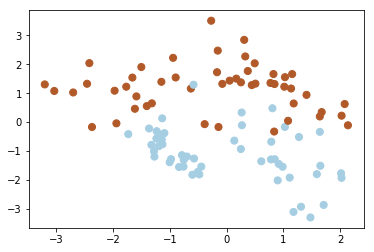

In [48]:
hundred_X, hundred_y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

mlutils.plot_2d_clf_problem(hundred_X, hundred_y, h=None)
plt.show()

Log loss = 2.417738335566654


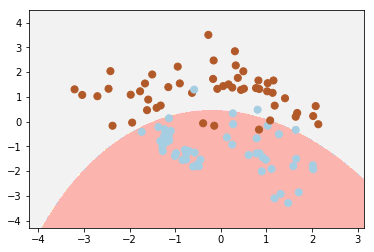

Log loss = 2.0723425756432454


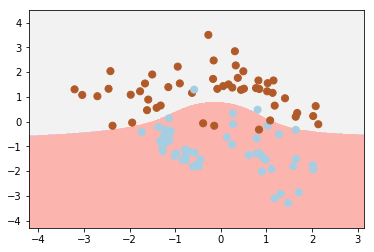

In [49]:
model = LogisticRegression(max_iter=5000, solver='sag', C=0.1)
degrees = np.array([2, 3])

for degree in degrees:
    poly = PolynomialFeatures(degree)
    model.fit(poly.fit_transform(hundred_X), hundred_y)
    
    print("Log loss = {}".format(log_loss(hundred_y, model.predict(poly.transform(hundred_X)))))
    mlutils.plot_2d_clf_problem(hundred_X, hundred_y, lambda x : model.predict(poly.transform(x)))
    plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

**A:** U neregulariziranom ili slabo regulariziranom postupku model s hiperparametrom $d=3$ *overfit*-a primjere za učenje, dok u regulariziranom postupku s većim faktorom $\alpha$ model s $d=2$ *underfit*-a podatke. 

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score

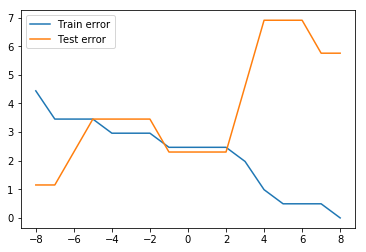

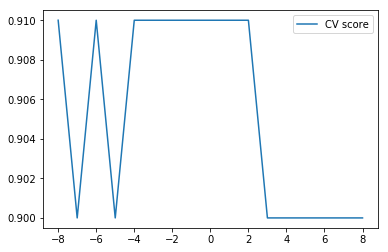

In [52]:
X_train, X_test, y_train, y_test = train_test_split(hundred_X, hundred_y, test_size=0.3, random_state=19)
poly = PolynomialFeatures(degree=4)
alphas = np.arange(-8, 9)
train_error = []
test_error = []
cv_score = []

for alpha in alphas:
    model = LogisticRegression(max_iter=10000, C=2**alpha, fit_intercept=False)
    model.fit(poly.fit_transform(X_train), y_train)
    
    train_error.append(log_loss(y_train, model.predict(poly.transform(X_train))))
    test_error.append(log_loss(y_test, model.predict(poly.transform(X_test))))
    
    cv_score.append(cross_val_score(model, hundred_X, hundred_y, cv=10).mean())

plt.plot(alphas, train_error, label='Train error')
plt.plot(alphas, test_error, label='Test error')
plt.legend(loc='best')
plt.show()

plt.plot(alphas, cv_score, label='CV score')
plt.legend(loc='best')
plt.show()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?

**A:** Podnaučenost odgovara dijelu grafikona s visokim iznosima obe pogreške, dok je za prenaučenost uobičajena niska empirijska pogreška uz visoku pogrešku generalizacije.

**A:** Kako je primjera malo, pa se rezultati uvelike mijenjaju ovisno o svakom pojedinom slučajnom odabiru podjele *train:test*, potrebno je koristiti unakrsnu validaciju za odabir hiperparametara. Konkretno u slučaju skupa `hundred` optimalan faktor $\alpha$ iznosi $\alpha=-5$.